In [4]:
import openpyxl 
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Import the excel workbook
wb = openpyxl.load_workbook('Politics_at_UCSD.xlsx')

#Import the active worksheet
ws = wb.active

#Import Data from different columns
#Column B or Column 2 indicate canidates
#Column C or Column 3 indicate why voted for canidates
#Column D or Column 4 indicate primary news source
Canidates_array = []
Canidates_count = {}

Reasons_array = []
Reasons_split = []
Reasons_count = {}

News_array = []
News_split = []
News_count = {}

In [7]:
#Import Data from Excel into our arrays, and clean the data
start = 2
end = 367

h_reasons = []
d_reasons = []
b_reasons = []
#Import the different columns
for index in range(start,end):
    Canidates_array.append(ws.cell(row=index,column=2).value)
    Reasons_array.append(ws.cell(row=index,column=3).value)
    News_array.append(ws.cell(row=index,column=4).value)
    
    if Canidates_array[index-1] == 'Donald Trump':
        d_reasons.append(Reasons_array[index-1])
    elif Canidates_array[index-1] == 'Bernie Sanders':
        b_reasons.append(Reasons_array[index-1])
    elif Canidates_array[index-1] == 'Hillary Clinton':
        h_reasons.append(Reasons_array[index-1])
    elif Canidates_array[index-1] == 'Hilary Clinton':
        h_reasons.append(Reasons_array[index-1])
    
#Count the Canidates
for ca in Canidates_array:
    if ca in Canidates_count:
        Canidates_count[ca] = Canidates_count[ca] + 1
    else:
        Canidates_count[ca] = 1
        
#Split Reasons
for r in Reasons_array:
    if r is not None:
        temp = r.split(',')
        for t in temp:
            Reasons_split.append( t )
    else:
        Reasons_split.append( r )

#Count the Reasons
for rs in Reasons_split:
    if rs in Reasons_count:
        Reasons_count[rs] = Reasons_count[rs] + 1
    else:
        Reasons_count[rs] = 1

#Split News
for n in News_array:
    if n is not None:
        temp = n.split(',')
        for t in temp:
            News_split.append( t )
    else:
        News_split.append( r )

#Count the News Sources
for ns in News_split:
    if ns in News_count:
        News_count[ns] = News_count[ns] + 1
    else:
        News_count[ns] = 1


In [40]:
#Sort responses by canidate. Reasons for voting for each canidate

#D represent Donald Trump
d_split = []
d_count = {}
d_wa = []  #wa = word array
#Split Reasons
for r in d_reasons:
    if r is not None:
        temp = r.split(',')
        for t in temp:
            d_split.append( t )
    else:
        d_split.append( r )

#Count the Reasons
for rs in d_split:
    if rs in d_count:
        d_count[rs] = d_count[rs] + 1
    else:
        d_count[rs] = 1


for key in d_count:
    if d_count[key] < 5:
        d_wa.append(key)
#print(d_wa)


#B stands for Bernie Sanders
b_split = []
b_count = {}
b_wa = []  #wa = word array
#Split Reasons
for r in b_reasons:
    if r is not None:
        temp = r.split(',')
        for t in temp:
            b_split.append( t )
    else:
        b_split.append( r )

#Count the Reasons
for rs in b_split:
    if rs in b_count:
        b_count[rs] = b_count[rs] + 1
    else:
        b_count[rs] = 1


for key in b_count:
    if b_count[key] < 5:
        b_wa.append(key)
print(b_wa)


#H Stands for Hillary Clinton
h_split = []
h_count = {}
h_wa = []  #wa = word array
#Split Reasons
for r in h_reasons:
    if r is not None:
        temp = r.split(',')
        for t in temp:
            h_split.append( t )
    else:
        h_split.append( r )

#Count the Reasons
for rs in h_split:
    if rs in h_count:
        h_count[rs] = h_count[rs] + 1
    else:
        h_count[rs] = 1


for key in h_count:
    if h_count[key] < 5:
        h_wa.append(key)
#print(h_wa)

#The results from d_wa, b_wa, and h_wa were each pasted into wordclouds 
#website to make a visual word cloud of the repsonses
#A transparent image of their head from google was taken for a background
#http://www.wordclouds.com/

[" I prefer Bernie because he would look out for the lower class. He doesn't support big businesses and just isn't corrupt. He has a vision to better things and bring about real social change which I agree with. He also seeks to help college students with debt which is a huge issue right now. It should not be this hard for someone to receive an education. ", ' especially for communities of color', ' raise minimum wage', ' Bernie Sanders is the only presidential candidate who is not beholden to big businesses and is willing to harness the power of the people in order to remedy inequalities!', ' I believe his policies are what is necessary for our country to move towards progress in renewable energy', ' and gun control.', ' but what he actually believes. ', ' makes more sense in this political day and age', ' working towards free college tuition and debt forgiveness', ' healthier', ' but I believe he can start a critical overhaul of the current political system that is needed at the curr

In [9]:
#Cleaning Data some more - Part 1 - Cleaning Canidates Data

#In Canidate_counts, Hillary Clinton is sometimes recorded as Hilary Clinton
if 'Hilary Clinton' in Canidates_count:
    Canidates_count['Hillary Clinton'] = Canidates_count['Hillary Clinton'] + Canidates_count['Hilary Clinton']
    del Canidates_count['Hilary Clinton']

c_keys_to_remove = []
for key in Reasons_count:
    if Reasons_count[key] < 5:
        c_keys_to_remove.append(key)

Reasons_count['Other'] = len(c_keys_to_remove)
for key in c_keys_to_remove:
    del Reasons_count[key]

In [10]:
#Cleaning Data some more - Part 2 - Cleaning Reasons Data
#Note- This data set needed the most cleaning

#In Reason_counts, One string was split into 3. It was combined to a sorter 
#'Their platform' string, and recorded in other for redundancy
s1 = ' please elaborate in the "other" section provided below'
s2 = ' Their platform (If marked'
s3 = 'Their platform (If marked'
s4 = ' no character max)'
s5 = 'I like them more than the other candidates'
s6 = ' I like them more than the other candidates'
s = 'Their platform'
Reasons_count[s] = 1
if s1 in Reasons_count:
    Reasons_count[s] = Reasons_count[s] + Reasons_count[s1]
    del Reasons_count[s1]
    del Reasons_count[s4]
if s2 in Reasons_count:
    Reasons_count[s] = Reasons_count[s] + Reasons_count[s2]
    del Reasons_count[s2]
if s3 in Reasons_count:
    Reasons_count[s] = Reasons_count[s] + Reasons_count[s3]
    del Reasons_count[s3]
if s6 in Reasons_count:
    Reasons_count[s5] = Reasons_count[s5] + Reasons_count[s6]
    del Reasons_count[s6]
Reasons_count[s] = Reasons_count[s] - 1

In [11]:
#Cleaning Data some more - Part 3 - Cleaning News Data

#In News Counts, remove values that are small
n_keys_to_remove = []
for key in News_count:
    if News_count[key] < 5:
        n_keys_to_remove.append(key)

News_count['Other'] = len(n_keys_to_remove)
for key in n_keys_to_remove:
    del News_count[key]


# Simplify answers. 
# Buzzfeed, Jezebel, Reddit are secondary news sources
# Count should be 151
z = 'Secondary New Sources'
z1= ' Secondary news sources (Buzzfeed'
z2= ' Jezebel'
z3= ' Reddit'
z4= 'Secondary news sources (Buzzfeed'
News_count[z] = 1
if z1 in News_count:
    News_count[z] = News_count[z] + News_count[z1]
    del News_count[z1]
if z2 in News_count:
    News_count[z] = News_count[z] + News_count[z2]
    del News_count[z2]
if z3 in News_count:
    News_count[z] = News_count[z] + News_count[z3]
    del News_count[z3]
if z4 in News_count:
    News_count[z] = News_count[z] + News_count[z4]
    del News_count[z4]
News_count[z] = News_count[z]-1

# CNN, FOX, New York Times, MSNBC, LA Times, ABC, NBC
#  are primary news sources, Count should be 255
z = 'Primary New Sources'
z1= ' Primary news sources (CNN'
z2= 'Primary news sources (CNN'
z3= ' MSNBC'
z4= ' New York Times'
z5= ' ABC'
z6= ' FOX'
z7= ' LA Times'
z8= ' NBC'
News_count[z] = 1
if z1 in News_count:
    News_count[z] = News_count[z] + News_count[z1]
    del News_count[z1]
if z2 in News_count:
    News_count[z] = News_count[z] + News_count[z2]
    del News_count[z2]
if z3 in News_count:
    News_count[z] = News_count[z] + News_count[z3]
    del News_count[z3]
if z4 in News_count:
    News_count[z] = News_count[z] + News_count[z4]
    del News_count[z4]
if z5 in News_count:
    News_count[z] = News_count[z] + News_count[z5]
    del News_count[z5]
if z6 in News_count:
    News_count[z] = News_count[z] + News_count[z6]
    del News_count[z6]
if z7 in News_count:
    News_count[z] = News_count[z] + News_count[z7]
    del News_count[z7]
if z8 in News_count:
    News_count[z] = News_count[z] + News_count[z8]
    del News_count[z8]
News_count[z] = News_count[z]-1

# Facebook, Instagram, Twitter are social media
#Count should be 178
z= 'Social Media'
z1= ' Twitter'
z2= 'Social Media (Facebook'
z3= ' Instagram'
News_count[z] = 1
if z1 in News_count:
    News_count[z] = News_count[z] + News_count[z1]
    del News_count[z1]
if z2 in News_count:
    News_count[z] = News_count[z] + News_count[z2]
    del News_count[z2]
if z3 in News_count:
    News_count[z] = News_count[z] + News_count[z3]
    del News_count[z3]
News_count[z] = News_count[z]-1

#Removing a double
z = 'My family/friends'
z1 =' My family/friends'
News_count[z] = 1
if z1 in News_count:
    News_count[z] = News_count[z] + News_count[z1]
    del News_count[z1]
News_count[z] = News_count[z]-1 
    
#Other Outliers to remove
z  = 'Their platform'
z1 = 'Other'
z2 = ' etc.)'
z3 = 'Their platform (If marked, please elaborate in the "other" section provided below, no character max)'
if z1 in News_count:
    del News_count[z1]
if z2 in News_count:
    del News_count[z2]
News_count[z] = 1
if z3 in News_count:
    News_count[z] = News_count[z] + News_count[z3]
    del News_count[z3]
News_count[z] = News_count[z]-1 


In [28]:
#Cannot sort dictionary type, so created arrays of the 
#labels in already sorted order. Also added new lines
#for the bar graph
Canidates_sorted = ['I am ineligible \n to vote.',
    'None',
    "I'm not voting.", 
    "I'm not \n sure yet.", 
    'Hillary Clinton', 
    'Bernie Sanders',
    'Donald Trump']
    
Reasons_sorted = ['Not voting.',
 'None', 
 'They are \n from my \n political party', 
 'I like them \n more than the \n other candidates',
 'I have heard \n good things \n about them', 
 'I like them \n more than the \n other candidates', 
 'Their personality',
 'Other', 
 'Their platform']

News_sorted = ["I don't \n actively obtain \n political information.", 
 'Their platform',
 'My family/friends', 
 'Secondary \n New Sources', 
  'Social Media', 
 'Primary New \n Sources']


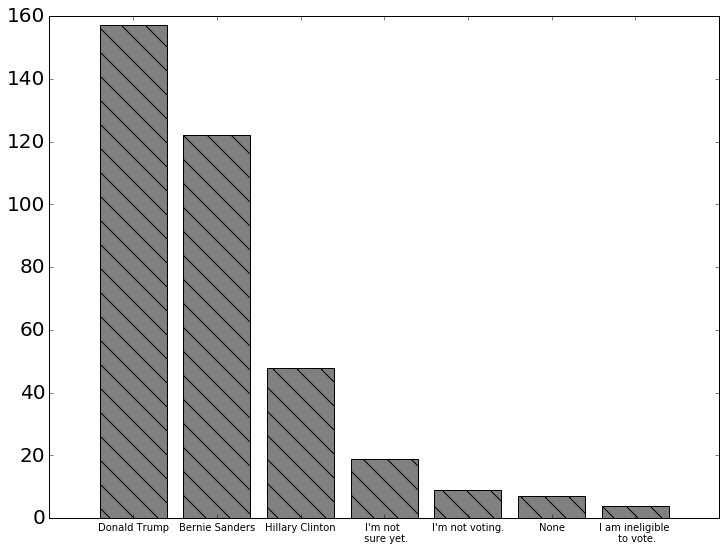

In [29]:
#Ploting Bar Graphs - Part 1 - Canidates

plt.figure(figsize=(12, 9)) 
bars = plt.bar(range(len(Canidates_count)), 
        sorted(Canidates_count.values(), reverse = True), align='center',
        color = 'gray', hatch = '\\')
plt.xticks(range(len(Canidates_count)), 
           list(reversed(Canidates_sorted)), size = 10)
patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
#for bar, pattern in zip(bars, patterns):
#    bar.set_hatch(pattern)
plt.savefig('Images/Canidates_Bar.jpeg')

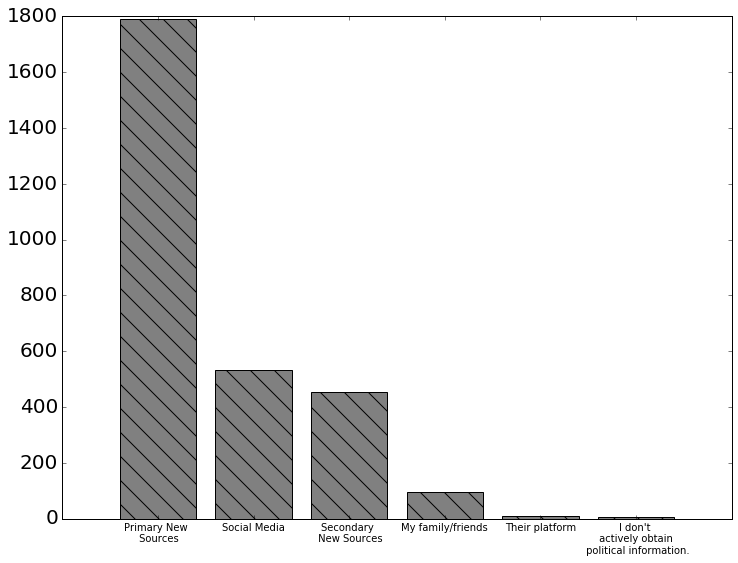

In [30]:
#Ploting Bar Graphs - Part 2 - News
plt.figure(figsize=(12, 9)) 
plt.bar(range(len(News_count)), 
        sorted(News_count.values(), reverse = True), 
        align='center', color = 'gray', hatch = '\\')
plt.xticks(range(len(News_sorted)), 
           list(reversed(News_sorted)), size = 10)
plt.savefig('Images/News_Bar.jpeg')

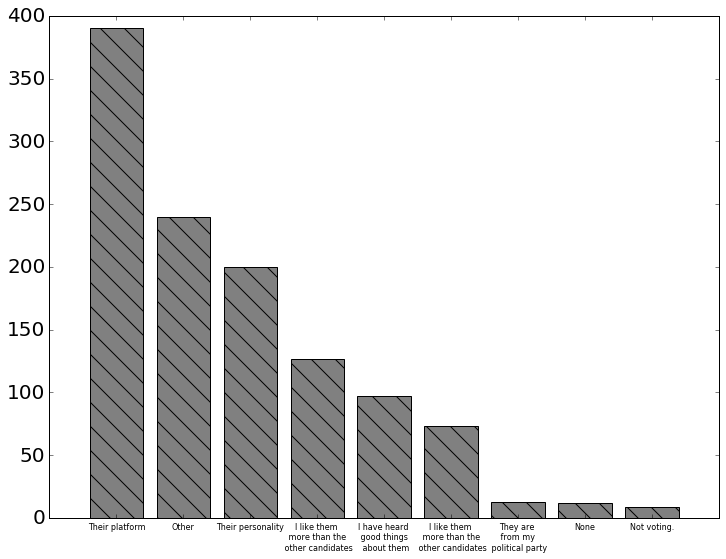

In [31]:
#Ploting Bar Graphs - Part 3 - Reasons
plt.figure(figsize=(12, 9)) 
plt.bar(range(len(Reasons_count)), 
        sorted(Reasons_count.values(), reverse = True), 
        align='center', color = 'gray', hatch = '\\')
plt.xticks(range(len(Reasons_sorted)), 
           list(reversed(Reasons_sorted)), size = 8)
plt.savefig('Images/Reasons_Bar.jpeg')

In [32]:
#PLoting Pie Charts - Part 0 - Importing Colors
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
## The values above go can be any value from 0 to 255
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  
#print(tableau20)

In [33]:
#PLoting Pie Charts - Part 0 - Redeclaring labels without newline characters
Canidates_sorted = ['I am ineligible to vote.',
    'None',
    "I'm not voting.", 
    "I'm not sure yet.", 
    'Hillary Clinton', 
    'Bernie Sanders',
    'Donald Trump']
    
Reasons_sorted = ['Not voting.',
 'None', 
 'They are from my political party', 
 'I like them more than the other candidates',
 'I have heard good things about them', 
 'I like them more than the other candidates', 
 'Their personality',
 'Other', 
 'Their platform']

News_sorted = ["I don't actively obtain political information.", 
 'Their platform',
 'My family/friends', 
 'Secondary New Sources', 
  'Social Media', 
 'Primary New Sources']

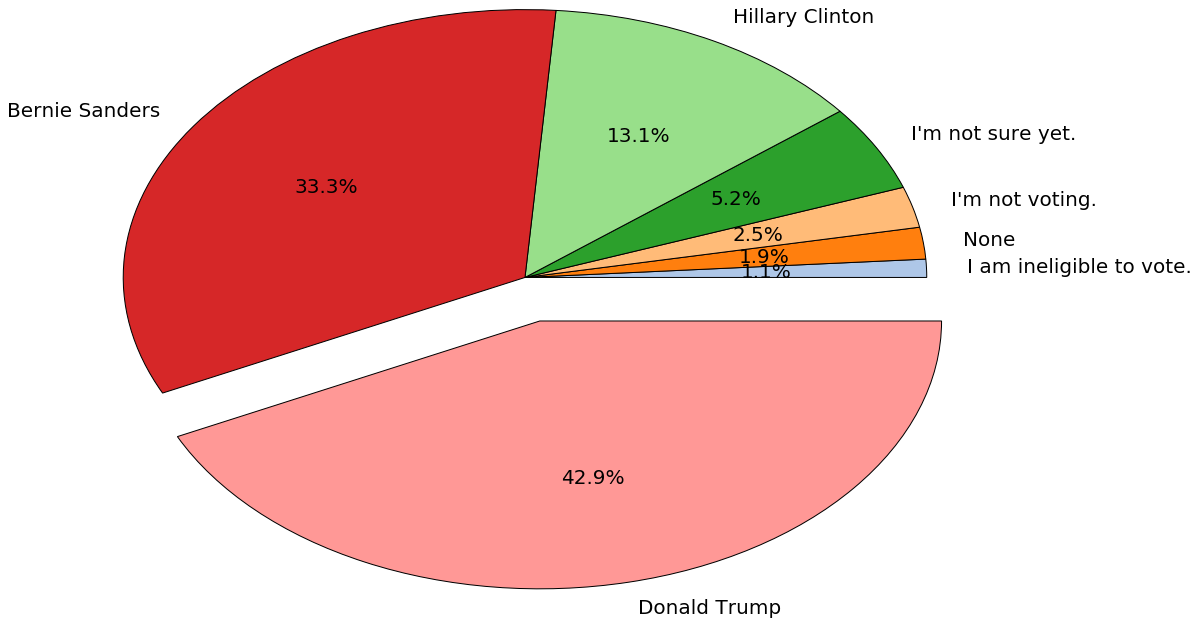

In [38]:
#PLoting Pie Charts - Part 1 - Canidates
#This one uses the explode parameter
Can_value = []
explode = (0, 0, 0, 0, 0, 0, 0.5)
for val in sorted(Canidates_count.values()):
    Can_value.append(val)
plt.rcParams['font.size'] = 20
plt.pie(Can_value, labels=Canidates_sorted, colors=tableau20[1:8], 
        autopct='%1.1f%%', startangle=0, radius = 3, explode = explode)
plt.savefig('Images/Canidates_Pie.jpeg', bbox_inches='tight')

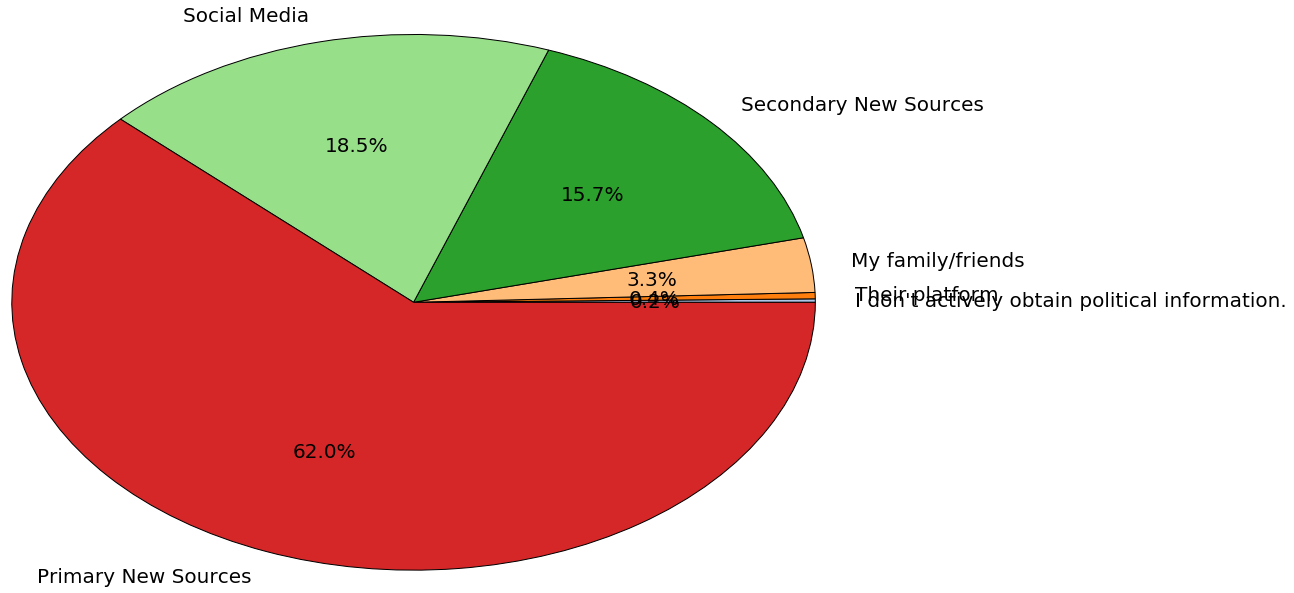

In [37]:
#PLoting Pie Charts - Part 2- News
New_value = []
for val in sorted(News_count.values()):
    New_value.append(val)
plt.rcParams['font.size'] = 20
plt.pie(New_value, labels=News_sorted, colors=tableau20[1:8], 
        autopct='%1.1f%%', startangle=0, radius = 3)
plt.savefig('Images/News_Pie.jpeg', bbox_inches='tight')

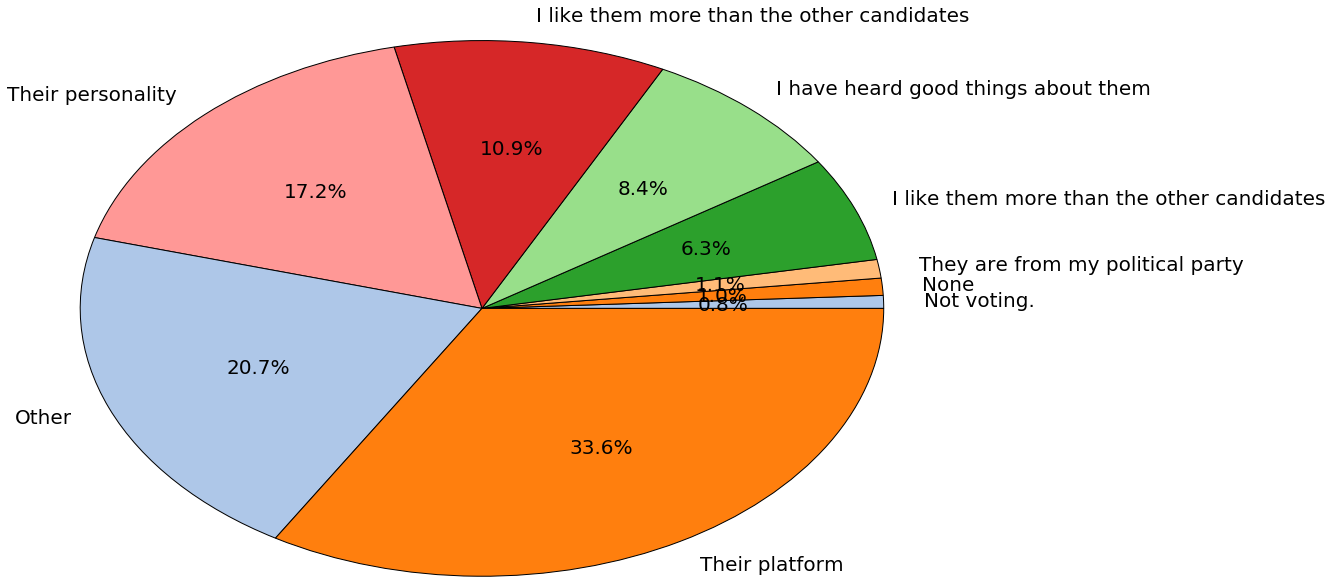

In [39]:
#PLoting Pie Charts - Part 3 - Reasons
Res_value = []
for val in sorted(Reasons_count.values()):
    Res_value.append(val)
plt.rcParams['font.size'] = 20
plt.pie(Res_value, labels=Reasons_sorted, colors=tableau20[1:8], 
        autopct='%1.1f%%', startangle=0, radius = 3)
plt.savefig('Images/Reasons_Pie.jpeg', bbox_inches='tight')

In [21]:
#Done